# S&P 500

# Mergin Macro, Financials, and Sentiment

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_b = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /sp500_macro_financials.csv')

df_d = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /sp500_text_classified.csv')


## Fundamental and Macro

In [ ]:
df_b.head(3)

,Unnamed: 0,Instrument,Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,...,Year,Month,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,0,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,...,2022.0,12.0,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068
1,1,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,...,2022.0,12.0,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068
2,2,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,...,2022.0,12.0,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068


In [ ]:
df_b.columns

Index(['Unnamed: 0', 'Instrument', 'Name', 'Country',
       'TRBC Industry Group Name', 'GICS Sector Name', 'Currency', 'Date',
       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio',
       'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio',
       'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares',
       'EV/EBITDA', 'P/E', 'Forward P/E', 'Forward EV/EBITDA', 'Year', 'Month',
       'GDP', 'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
       'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP'],
      dtype='object')

In [ ]:
# Drop columns
columns_to_drop = ['Unnamed: 0']
df_b = df_b.drop(columns=columns_to_drop)

## Classified text

In [ ]:
df_d.head(3)

,Unnamed: 0,Instrument,Activation Date,Guidance Measure,Guidance Text,The Doc Type,Year,Month,preprocessed_text,num_tokens,sentiment_results,sentiment_score,esg_classification,esg_classification_score,fls_classification,fls_classification_score,sentiment_numerical,esg_numerical,fls_numerical
0,12,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",0.820102,"{'label': 'None', 'score': 0.9865126609802246}",0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",0.890123,1,4,1
1,18,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",0.820102,"{'label': 'None', 'score': 0.9865126609802246}",0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",0.890123,1,4,1
2,24,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",0.820102,"{'label': 'None', 'score': 0.9865126609802246}",0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",0.890123,1,4,1


In [ ]:
df_d.columns

Index(['Unnamed: 0', 'Instrument', 'Activation Date', 'Guidance Measure',
       'Guidance Text', 'The Doc Type', 'Year', 'Month', 'preprocessed_text',
       'num_tokens', 'sentiment_results', 'sentiment_score',
       'esg_classification', 'esg_classification_score', 'fls_classification',
       'fls_classification_score', 'sentiment_numerical', 'esg_numerical',
       'fls_numerical'],
      dtype='object')

# Merging

In [ ]:
# Drop columns
columns_to_drop = ['Unnamed: 0', 'Activation Date',
       'num_tokens', 'sentiment_results',
       'esg_classification',  'fls_classification']
df_d = df_d.drop(columns=columns_to_drop)

In [ ]:
print(df_b.columns)
print(df_d.columns)

Index(['Instrument', 'Name', 'Country', 'TRBC Industry Group Name',
       'GICS Sector Name', 'Currency', 'Date', 'Revenue', 'Gross Profit',
       'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
       'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield',
       'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt',
       'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E',
       'Forward EV/EBITDA', 'Year', 'Month', 'GDP', 'Stock traded pct GDP',
       'Inflation pct', 'Unemployment Rate pct', 'Government Debt pct GDP',
       'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP'],
      dtype='object')
Index(['Instrument', 'Guidance Measure', 'Guidance Text', 'The Doc Type',
       'Year', 'Month', 'preprocessed_text', 'sentiment_score',
       'esg_classification_score', 'fls_classification_score',
       'sentiment_numerical', 'esg_numerical', 'fls_numerical'],
      dtype='object')


In [ ]:
print(df_b.dtypes)
print(df_d.dtypes) # the data type has to be changed

Instrument                         object
Name                               object
Country                            object
TRBC Industry Group Name           object
GICS Sector Name                   object
Currency                           object
Date                               object
Revenue                           float64
Gross Profit                      float64
EBIT                              float64
EBITDA                            float64
Total Assets                      float64
Total Liabilities                 float64
Enterprise Value                  float64
Free Cash Flow                    float64
PE Ratio                          float64
Dividend Yield                    float64
Net Profit Margin pct             float64
Current Ratio                     float64
Quick Ratio                       float64
Total Debt                        float64
WACC pct                          float64
Outstanding Tot Shares            float64
EV/EBITDA                         

In [ ]:
print(df_b.shape)
print(df_d.shape)

(9269, 37)
(9866, 13)


## Creating the quarters

In [ ]:
df_b['Year'] = df_b['Year'].astype(int)
df_b['Month'] = df_b['Month'].astype(int)

In [ ]:
df_b['Quarter'] = ((df_b['Month'] - 1) // 3) + 1
df_d['Quarter'] = ((df_d['Month'] - 1) // 3) + 1

In [ ]:
merged_df = pd.merge(df_b, df_d, on=['Instrument', 'Year', 'Quarter'], how='inner')
merged_df.shape

(5558, 49)

In [ ]:
merged_df.columns

Index(['Instrument', 'Name', 'Country', 'TRBC Industry Group Name',
       'GICS Sector Name', 'Currency', 'Date', 'Revenue', 'Gross Profit',
       'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
       'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield',
       'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt',
       'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E',
       'Forward EV/EBITDA', 'Year', 'Month_x', 'GDP', 'Stock traded pct GDP',
       'Inflation pct', 'Unemployment Rate pct', 'Government Debt pct GDP',
       'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP', 'Quarter', 'Guidance Measure',
       'Guidance Text', 'The Doc Type', 'Month_y', 'preprocessed_text',
       'sentiment_score', 'esg_classification_score',
       'fls_classification_score', 'sentiment_numerical', 'esg_numerical',
       'fls_numerical'],
      dtype='object')

In [ ]:
merged_df.head(3)

,Instrument,Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,EBIT,...,Guidance Text,The Doc Type,Month_y,preprocessed_text,sentiment_score,esg_classification_score,fls_classification_score,sentiment_numerical,esg_numerical,fls_numerical
0,AJG.N,Arthur J. Gallagher & Co.,United States of America,Insurance,Financials,USD,2022-12-31 00:00:00+00:00,7.068353e+09,3.131764e+09,1.848803e+09,...,Am I right saying that?,Transcript,10,right saying ?,0.999785,0.972354,0.961731,0,4,2
1,AJG.N,Arthur J. Gallagher & Co.,United States of America,Insurance,Financials,USD,2022-12-31 00:00:00+00:00,7.068353e+09,3.131764e+09,1.848803e+09,...,Am I right saying that?,Transcript,10,right saying ?,0.999785,0.972354,0.961731,0,4,2
2,WM.N,Waste Management Inc,United States of America,Professional & Commercial Services,Industrials,USD,2022-12-31 00:00:00+00:00,1.628335e+10,7.637419e+09,2.833756e+09,...,And understanding how that kind of EBITDA bene...,Transcript,10,understanding kind ebitda benefit flow model t...,0.790094,0.955455,0.964601,0,4,2


# Re-Organising the columns

In [ ]:
df = merged_df[['Instrument', 'Name', 'Country', 'TRBC Industry Group Name', 'GICS Sector Name', 'Currency',
         'Year', 'Quarter', 'Month_x', 'Date',       'Forward EV/EBITDA',
         'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value',
         'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio',
         'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E',
         'GDP', 'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct', 'Government Debt pct GDP',
         'Balance of Trade', 'Exchange Rate USD', 'Government Consumption pct GDP',
         'Guidance Measure', 'Guidance Text', 'The Doc Type', 'preprocessed_text',
         'sentiment_score', 'esg_classification_score', 'fls_classification_score',
         'sentiment_numerical', 'esg_numerical', 'fls_numerical', 'Month_y']]

In [ ]:
df = df.drop(columns=['preprocessed_text', 'Guidance Text','GICS Sector Name'])#-3

In [ ]:
df.shape

(5558, 46)

# Missing values

In [ ]:
# Count NaN values in each column of the DataFrame
nan_counts = df.isna().sum()

# Display the counts of NaN values
print(nan_counts)

Instrument                           0
Name                                 0
Country                              0
TRBC Industry Group Name             0
Currency                             0
Year                                 0
Quarter                              0
Month_x                              0
Date                                 0
Forward EV/EBITDA                   12
Revenue                             12
Gross Profit                       318
EBIT                                32
EBITDA                              32
Total Assets                        32
Total Liabilities                   32
Enterprise Value                    12
Free Cash Flow                      32
PE Ratio                           437
Dividend Yield                    1103
Net Profit Margin pct                0
Current Ratio                      166
Quick Ratio                        166
Total Debt                          32
WACC pct                           133
Outstanding Tot Shares   

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Instantiate the IterativeImputer
imputer = IterativeImputer()

# Select the columns you want to impute
cols_to_impute  = ['Revenue','Gross Profit', 'EBIT', 'EBITDA', 'Free Cash Flow', 'PE Ratio',
                 'Dividend Yield', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'Total Assets',
                   'Total Liabilities','Enterprise Value',
                 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E','Forward EV/EBITDA']



# Apply the imputer to these columns
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Encoding

In [ ]:
df.shape

(5558, 46)

In [ ]:
df_f = df.copy() #CHECKPOINT

In [ ]:
columns_to_drop = ['Name','Date','Currency','Country'] #-4
df_f = df_f.drop(columns=columns_to_drop)

In [ ]:
df_f.dtypes

Instrument                         object
TRBC Industry Group Name           object
Year                                int64
Quarter                             int64
Month_x                             int64
Forward EV/EBITDA                 float64
Revenue                           float64
Gross Profit                      float64
EBIT                              float64
EBITDA                            float64
Total Assets                      float64
Total Liabilities                 float64
Enterprise Value                  float64
Free Cash Flow                    float64
PE Ratio                          float64
Dividend Yield                    float64
Net Profit Margin pct             float64
Current Ratio                     float64
Quick Ratio                       float64
Total Debt                        float64
WACC pct                          float64
Outstanding Tot Shares            float64
EV/EBITDA                         float64
P/E                               

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the specified columns and store the encoded values in new columns
df_f['Instrument_encoded'] = encoder.fit_transform(df_f['Instrument'])
df_f['TRBC_Industry_encoded'] = encoder.fit_transform(df_f['TRBC Industry Group Name'])

df_f['Guidance Measure_encoded'] = encoder.fit_transform(df_f['Guidance Measure'])
df_f['Doc_Type_encoded'] = encoder.fit_transform(df_f['The Doc Type'])
#+4

In [ ]:
df_f.to_csv('sp500_encoded_translation.csv')

In [ ]:
# Specify the order of columns
new_column_order = ['Instrument_encoded',
       'TRBC_Industry_encoded', 'Year','Quarter', 'Month_x','Month_y',#general
                    'Forward EV/EBITDA',#target

       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio',
       'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio',
       'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares',
                    'EV/EBITDA','P/E','Forward P/E',#financials

        'sentiment_numerical','sentiment_score',
            'esg_numerical' ,  'esg_classification_score',
              'fls_numerical'  ,     'fls_classification_score',#classifcation
       'GDP', 'Stock traded pct GDP', 'Inflation pct', #macro
       'Unemployment Rate pct', 'Government Debt pct GDP', 'Balance of Trade',
       'Exchange Rate USD', 'Government Consumption pct GDP']

# Reindex the DataFrame with the new column order
df_f = df_f.reindex(columns=new_column_order)

In [ ]:
df_f.shape

(5558, 40)

In [ ]:
df_f.head(3)

,Instrument_encoded,TRBC_Industry_encoded,Year,Quarter,Month_x,Month_y,Forward EV/EBITDA,Revenue,Gross Profit,EBIT,...,fls_numerical,fls_classification_score,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,1,21,2022,4,12,10,16.485255,7.068353e+09,3.131764e+09,1.848803e+09,...,2,0.961731,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068
1,1,21,2022,4,12,10,14.936336,7.068353e+09,3.131764e+09,1.848803e+09,...,2,0.961731,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068
2,145,31,2022,4,12,10,14.009946,1.628335e+10,7.637419e+09,2.833756e+09,...,2,0.964601,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068


In [ ]:
df_f.dtypes

Instrument_encoded                  int64
TRBC_Industry_encoded               int64
Year                                int64
Quarter                             int64
Month_x                             int64
Month_y                             int64
Forward EV/EBITDA                 float64
Revenue                           float64
Gross Profit                      float64
EBIT                              float64
EBITDA                            float64
Total Assets                      float64
Total Liabilities                 float64
Enterprise Value                  float64
Free Cash Flow                    float64
PE Ratio                          float64
Dividend Yield                    float64
Net Profit Margin pct             float64
Current Ratio                     float64
Quick Ratio                       float64
Total Debt                        float64
WACC pct                          float64
Outstanding Tot Shares            float64
EV/EBITDA                         

In [ ]:
df_f.to_csv('sp500_encoded.csv')

# Transformations

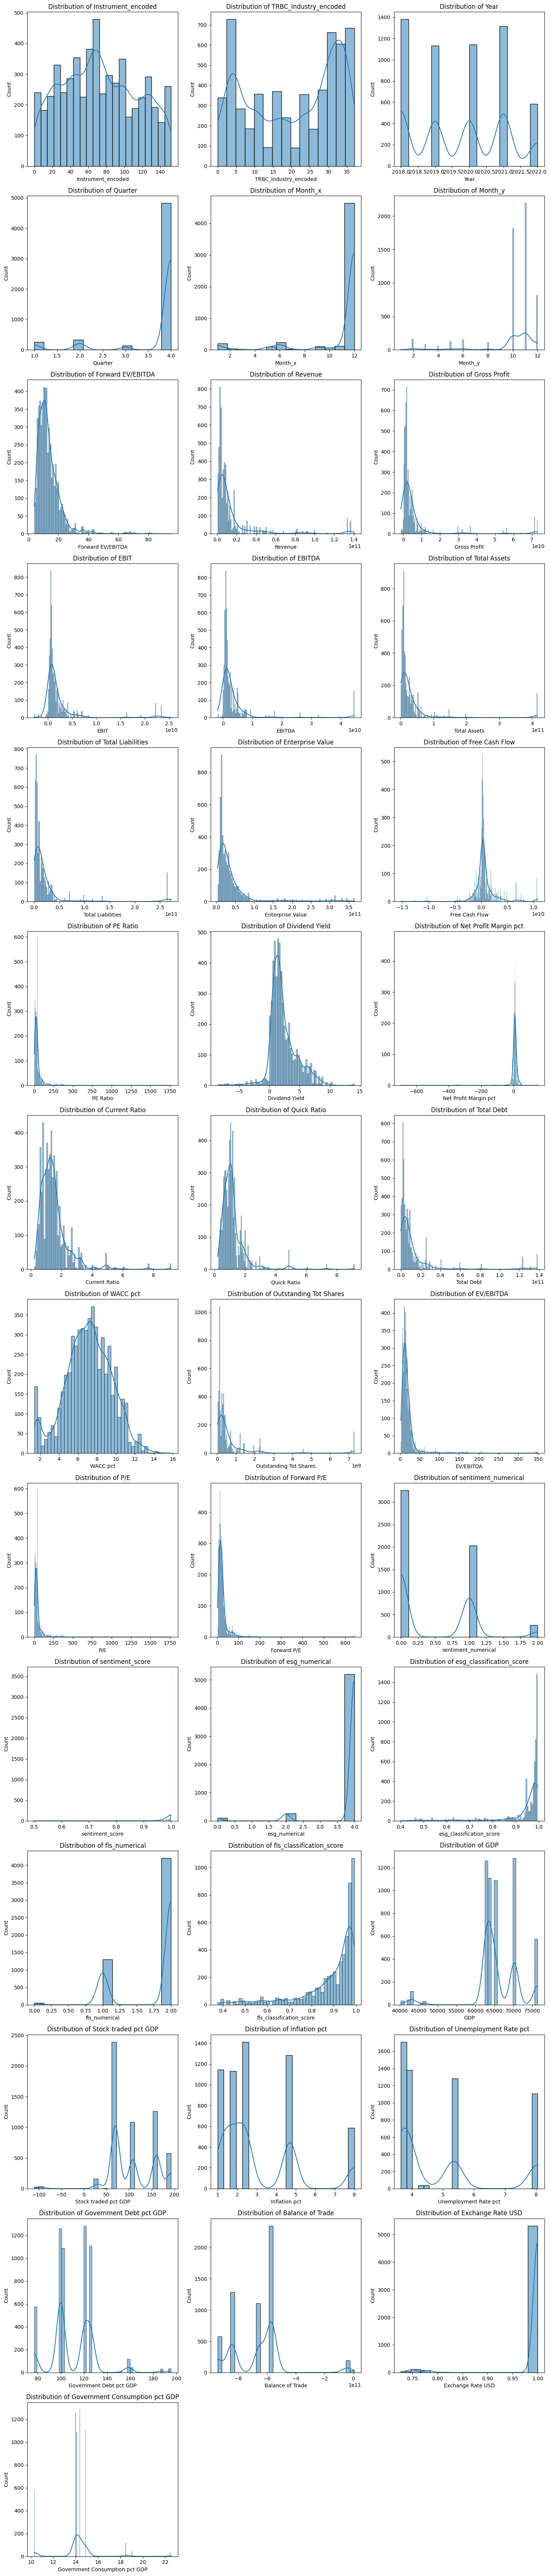

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Select numeric columns for plotting (excluding non-numeric columns)
numeric_columns = df_f.select_dtypes(include='number').columns

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows required for subplots
num_rows = (len(numeric_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Plot the distributions for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df_f, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Distribution statistics

In [ ]:
import pandas as pd

# Central Tendency
mean_values = df_f.mean(axis=0)  # axis=0 calculates the mean for each column
median_values = df_f.median(axis=0)
mode_values = df_f.mode(axis=0).iloc[0]  # In case of multiple modes, you can select the first one

# Variability
range_values = df_f.max() - df_f.min()
variance_values = df_f.var()
std_deviation_values = df_f.std()

# Skewness and Kurtosis
skewness_values = df_f.skew()
kurtosis_values = df_f.kurtosis()

# Quantiles
quartiles = df_f.quantile([0.25, 0.5, 0.75], axis=0)  # axis=0 calculates the quantiles for each column

In [ ]:
import pandas as pd

summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values,
    'Variance': variance_values,
    'Standard Deviation': std_deviation_values
})

summary_df

,Mean,Median,Mode,Range,Variance,Standard Deviation
Instrument_encoded,7.314897e+01,7.100000e+01,2.500000e+01,1.520000e+02,1.700949e+03,4.124257e+01
TRBC_Industry_encoded,2.020943e+01,2.300000e+01,4.000000e+00,3.700000e+01,1.468113e+02,1.211657e+01
Year,2.019747e+03,2.020000e+03,2.018000e+03,4.000000e+00,1.791491e+00,1.338466e+00
Quarter,3.714286e+00,4.000000e+00,4.000000e+00,3.000000e+00,6.068536e-01,7.790081e-01
Month_x,1.098795e+01,1.200000e+01,1.200000e+01,1.100000e+01,7.139858e+00,2.672051e+00
Month_y,9.993523e+00,1.100000e+01,1.100000e+01,1.100000e+01,5.285184e+00,2.298953e+00
Forward EV/EBITDA,1.353953e+01,1.178523e+01,6.763668e+00,9.119421e+01,6.402184e+01,8.001365e+00
Revenue,1.532327e+10,6.717131e+09,1.338522e+11,1.400783e+11,6.948484e+20,2.635998e+10
Gross Profit,6.141501e+09,2.085776e+09,7.159725e+10,7.438351e+10,1.799092e+20,1.341302e+10
EBIT,2.195648e+09,8.928393e+08,2.212972e+10,2.823820e+10,1.715715e+19,4.142119e+09


In [ ]:
# Skewness
skewness_values

Instrument_encoded                 0.121890
TRBC_Industry_encoded             -0.243554
Year                               0.110529
Quarter                           -2.607614
Month_x                           -2.716227
Month_y                           -2.258454
Forward EV/EBITDA                  3.244453
Revenue                            3.359124
Gross Profit                       4.040063
EBIT                               4.027037
EBITDA                             4.310952
Total Assets                       4.421350
Total Liabilities                  4.362983
Enterprise Value                   3.539901
Free Cash Flow                     1.128052
PE Ratio                          11.427932
Dividend Yield                     0.559639
Net Profit Margin pct            -12.961806
Current Ratio                      3.215374
Quick Ratio                        4.401412
Total Debt                         4.063499
WACC pct                          -0.150523
Outstanding Tot Shares          

In [ ]:
#Kurtosis
kurtosis_values

Instrument_encoded                 -1.001579
TRBC_Industry_encoded              -1.461622
Year                               -1.231282
Quarter                             5.380387
Month_x                             6.284170
Month_y                             4.543427
Forward EV/EBITDA                  18.154131
Revenue                            11.337046
Gross Profit                       15.951366
EBIT                               16.566380
EBITDA                             18.675964
Total Assets                       19.547638
Total Liabilities                  18.932534
Enterprise Value                   13.056989
Free Cash Flow                     11.681278
PE Ratio                          243.952252
Dividend Yield                      2.626114
Net Profit Margin pct             235.408411
Current Ratio                      17.144547
Quick Ratio                        28.158384
Total Debt                         16.804599
WACC pct                           -0.096437
Outstandin

## Trasformations

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Make a copy of your dataframe
df_transformations = df_f.copy()

# Log transformation for high positive skewness
cols_log_transform = ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
                      'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Total Debt', 'Outstanding Tot Shares','EV/EBITDA']

# Square root transformation for moderate positive skewness
cols_sqrt_transform = ['Dividend Yield', 'Current Ratio']

# Power transformation for negative skewness
cols_power_transform = ['Net Profit Margin pct', 'esg_classification_score', 'fls_classification_score',
                        'esg_numerical', 'sentiment_score']

# Yeo-Johnson transformation for variables with more complicated distributions
cols_yeo_johnson_transform = ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter',
                              'Month_x', 'Month_y', 'WACC pct', 'sentiment_numerical', 'GDP',
                              'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
                              'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
                              'Government Consumption pct GDP']

# Log Transformation
for col in cols_log_transform:
    df_transformations[col] = np.log(df_transformations[col] + 1)  # We add 1 to avoid division by zero

# Square Root Transformation
for col in cols_sqrt_transform:
    df_transformations[col] = np.sqrt(df_transformations[col])

# Power Transformation
for col in cols_power_transform:
    df_transformations[col] = np.power(df_transformations[col], 2)

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df_transformations[cols_yeo_johnson_transform] = pt.fit_transform(df_transformations[cols_yeo_johnson_transform])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_transformations.head(3)

,Instrument_encoded,TRBC_Industry_encoded,Year,Quarter,Month_x,Month_y,Forward EV/EBITDA,Revenue,Gross Profit,EBIT,...,fls_numerical,fls_classification_score,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,-2.141308,0.136946,2.220446e-16,0.3887,0.432485,-0.394935,16.485255,22.678893,21.864862,21.337804,...,2,0.924926,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
1,-2.141308,0.136946,2.220446e-16,0.3887,0.432485,-0.394935,14.936336,22.678893,21.864862,21.337804,...,2,0.924926,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
2,1.579104,0.880180,2.220446e-16,0.3887,0.432485,-0.394935,14.009946,23.513409,22.756326,21.764869,...,2,0.930455,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258


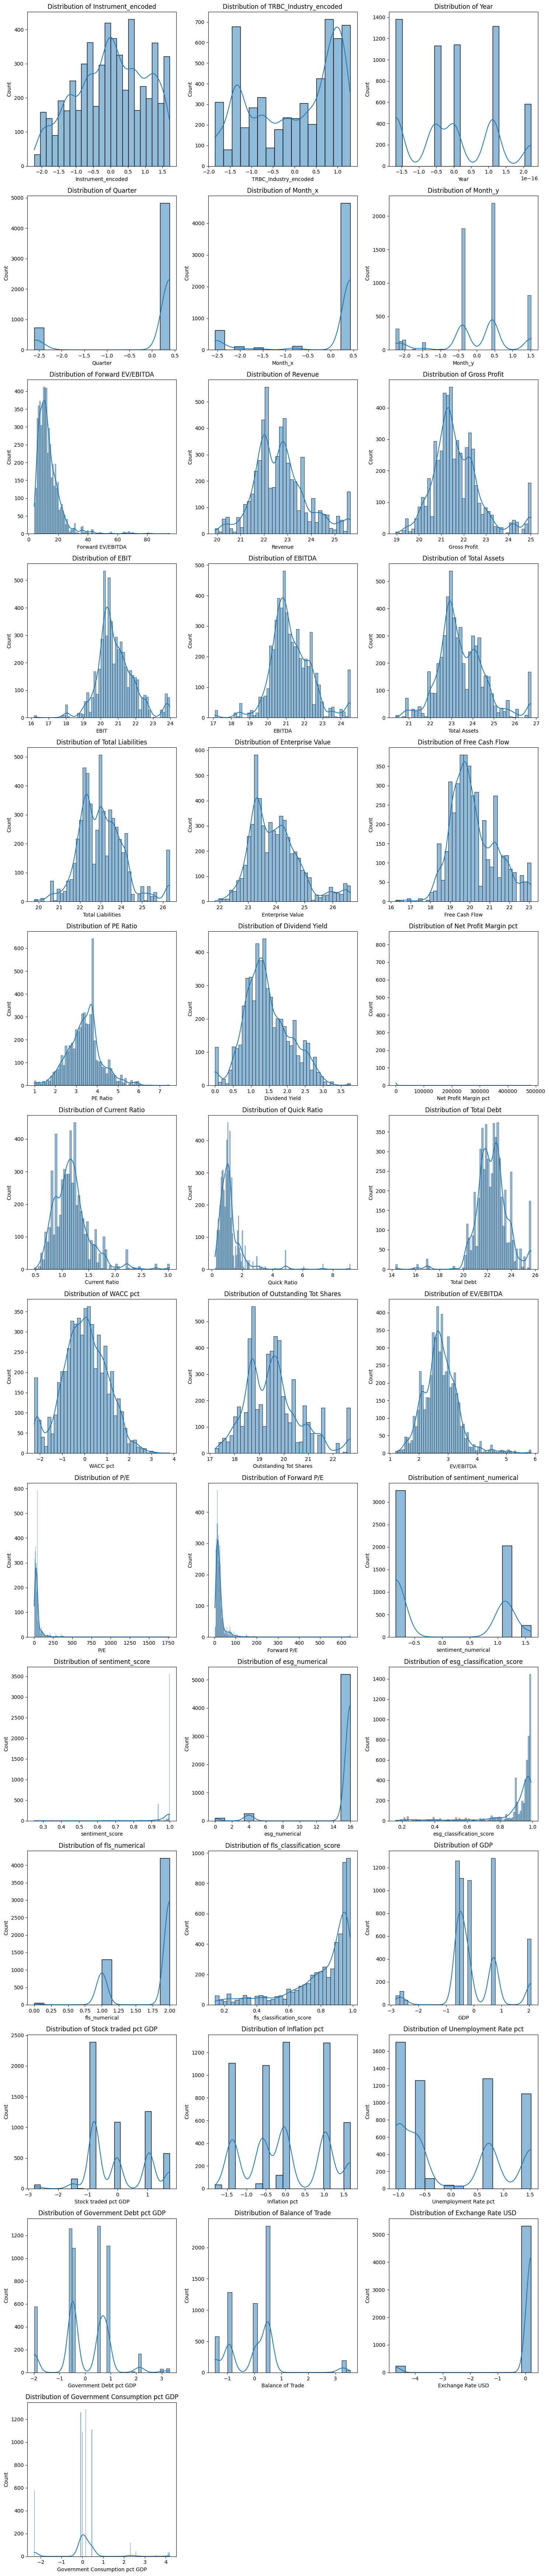

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Select numeric columns for plotting (excluding non-numeric columns)
numeric_columns = df_transformations.select_dtypes(include='number').columns

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows required for subplots
num_rows = (len(numeric_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Plot the distributions for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df_transformations, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Checking for NaN values in each column
nans = df_transformations.isna().sum()
print(nans)

Instrument_encoded                   0
TRBC_Industry_encoded                0
Year                                 0
Quarter                              0
Month_x                              0
Month_y                              0
Forward EV/EBITDA                    0
Revenue                              0
Gross Profit                        56
EBIT                               126
EBITDA                              54
Total Assets                         0
Total Liabilities                    0
Enterprise Value                     0
Free Cash Flow                    1223
PE Ratio                             0
Dividend Yield                     218
Net Profit Margin pct                0
Current Ratio                        0
Quick Ratio                          0
Total Debt                           0
WACC pct                             0
Outstanding Tot Shares               0
EV/EBITDA                            0
P/E                                  0
Forward P/E              

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# fill the nan but keep the distributions
imputer = IterativeImputer()
df_transformations = pd.DataFrame(imputer.fit_transform(df_transformations), columns=df_transformations.columns)

In [ ]:
df_transformations.to_csv('sp500_trasformed.csv')

# Multicollinearity

In [ ]:
#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for calculating VIF
df_numeric = df_f.select_dtypes(include=[np.number])

# Add a constant column for the intercept term
df_numeric["Intercept"] = 1

# Calculate VIF for each numeric column
vif = pd.DataFrame()
vif["variables"] = df_numeric.columns
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif)

                         variables           VIF
0               Instrument_encoded  1.215981e+00
1            TRBC_Industry_encoded  1.710110e+00
2                             Year  1.612616e+00
3                          Quarter  7.497136e+01
4                          Month_x  6.005061e+01
5                          Month_y  1.219783e+01
6                Forward EV/EBITDA  3.913729e+00
7                          Revenue  8.530321e+00
8                     Gross Profit  3.363354e+01
9                             EBIT  5.418131e+01
10                          EBITDA  1.191645e+02
11                    Total Assets  2.746431e+02
12               Total Liabilities  2.453215e+02
13                Enterprise Value  1.579488e+01
14                  Free Cash Flow  3.112505e+00
15                        PE Ratio  5.113369e+11
16                  Dividend Yield  3.030505e+00
17           Net Profit Margin pct  1.388680e+00
18                   Current Ratio  1.434618e+01
19                  

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


# FINAL DF

In [ ]:
df.head(3)

,Instrument,Name,Country,TRBC Industry Group Name,Currency,Year,Quarter,Month_x,Date,Forward EV/EBITDA,...,Government Consumption pct GDP,Guidance Measure,The Doc Type,sentiment_score,esg_classification_score,fls_classification_score,sentiment_numerical,esg_numerical,fls_numerical,Month_y
0,AJG.N,Arthur J. Gallagher & Co.,United States of America,Insurance,USD,2022,4,12,2022-12-31 00:00:00+00:00,16.485255,...,10.296068,EBITDA,Transcript,0.999785,0.972354,0.961731,0,4,2,10
1,AJG.N,Arthur J. Gallagher & Co.,United States of America,Insurance,USD,2022,4,12,2022-12-31 00:00:00+00:00,14.936336,...,10.296068,EBITDA,Transcript,0.999785,0.972354,0.961731,0,4,2,10
2,WM.N,Waste Management Inc,United States of America,Professional & Commercial Services,USD,2022,4,12,2022-12-31 00:00:00+00:00,14.009946,...,10.296068,EBITDA,Transcript,0.790094,0.955455,0.964601,0,4,2,10


In [ ]:
df_transformations.head(3)

,Instrument_encoded,TRBC_Industry_encoded,Year,Quarter,Month_x,Month_y,Forward EV/EBITDA,Revenue,Gross Profit,EBIT,...,fls_numerical,fls_classification_score,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,-2.141308,0.136946,2.220446e-16,0.3887,0.432485,-0.394935,16.485255,22.678893,21.864862,21.337804,...,2.0,0.924926,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
1,-2.141308,0.136946,2.220446e-16,0.3887,0.432485,-0.394935,14.936336,22.678893,21.864862,21.337804,...,2.0,0.924926,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
2,1.579104,0.880180,2.220446e-16,0.3887,0.432485,-0.394935,14.009946,23.513409,22.756326,21.764869,...,2.0,0.930455,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
